# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('LinearRegressionData.csv')

 SGDRegressor 또는 다른 회귀 모델에 입력될 독립 변수(특징)를 나타내는 2D 배열입니다. 각 행은 하나의 데이터 포인트(샘플)를 나타내며, 각 열은 하나의 특징을 나타냅니다. 여기서는 각 데이터 포인트가 하나의 특징 값을 가지므로, 1열짜리 배열로 표현됩니다.

In [19]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 열 전까지 데이터
y = dataset.iloc[:, -1].values # 마지막 열 데이터

X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #객체 생성
reg.fit(X,y) #학습 (모델 생성)

y_pred = reg.predict(X) #예측
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

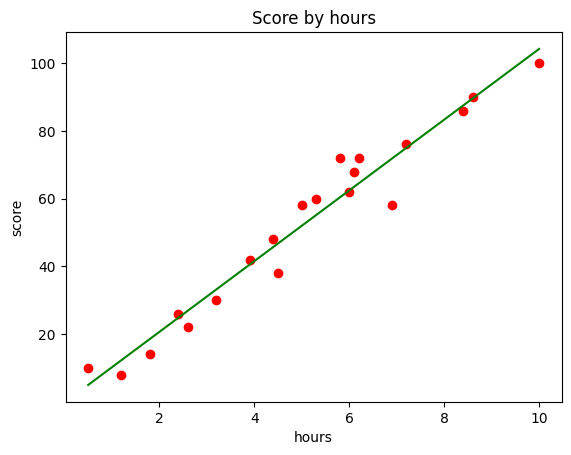

In [21]:
plt.scatter(X, y, color='red') # 산점도
plt.plot(X, y_pred, color='green') # 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [27]:
print('7시간 공부했을 때 예상 점수 : ', reg.predict([[7]])) # 7시간 공부했을 때 예상 점수

7시간 공부했을 때 예상 점수 :  [72.88739388]


np.float64(72.88739388114688)

y = mx + b  -> y = 10.4436x - 0.2184

In [24]:
reg.coef_ #기울기 (m)

array([10.44369694])

In [25]:
reg.intercept_ #y 절편 (b)

np.float64(-0.218484702867201)

### 데이터 세트 분리

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 8:2로 데이터 분리

X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [31]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [33]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

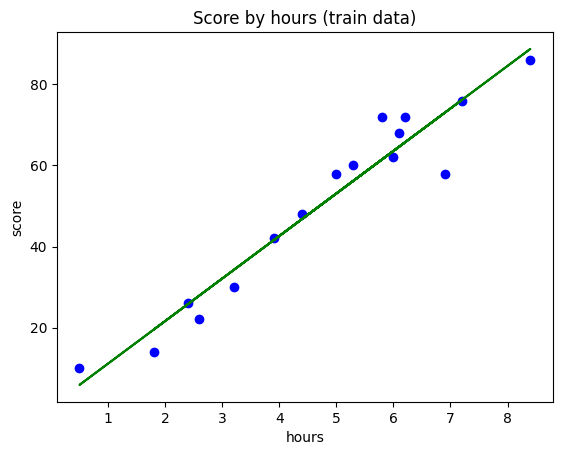

In [34]:
reg = LinearRegression() #객체 생성
reg.fit(X_train, y_train) #학습 (모델 생성)

plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

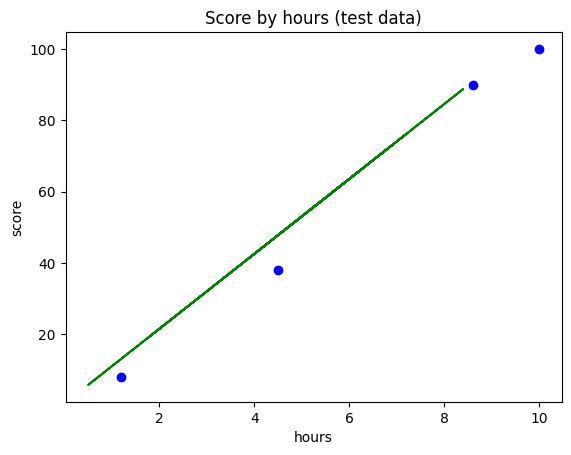

In [35]:
plt.scatter(X_test, y_test, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (test data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [36]:
reg.coef_ #기울기 (m)

array([10.49161294])

In [37]:
reg.intercept_ #y 절편 (b)

np.float64(0.6115562905169369)

### 모델 평가

In [38]:
 reg.score(X_train, y_train) #학습 데이터 정확도 (0 ~ 1)

0.9356663661221668

In [39]:
reg.score(X_test, y_test) #테스트 데이터 정확도 (0 ~ 1)

0.9727616474310156

## 경사 하강법 (Gradient Descent)
max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)

eta0 : 학습률 (learning rate)

verbose = 1 : Loss, Epoch 등 순차적으로 보여줌

tol (tolerance): 반복 사이의 개선이 tol 값보다 작아지면 훈련이 중지됩니다. 기본값은 1e-3입니다.

early_stopping: 조기 종료를 사용할지 여부를 결정합니다. 기본값은 False입니다.

-- Epoch 1
Norm: 10.24, NNZs: 1, Bias: 1.648438, T: 16, Avg. loss: 222.561210
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 10.61, NNZs: 1, Bias: 1.700749, T: 32, Avg. loss: 18.006934
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.34, NNZs: 1, Bias: 1.654252, T: 48, Avg. loss: 19.476216
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 10.45, NNZs: 1, Bias: 1.661281, T: 64, Avg. loss: 18.883552
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10.40, NNZs: 1, Bias: 1.642920, T: 80, Avg. loss: 19.125584
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.33, NNZs: 1, Bias: 1.623517, T: 96, Avg. loss: 18.922811
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.28, NNZs: 1, Bias: 1.605447, T: 112, Avg. loss: 18.759607
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


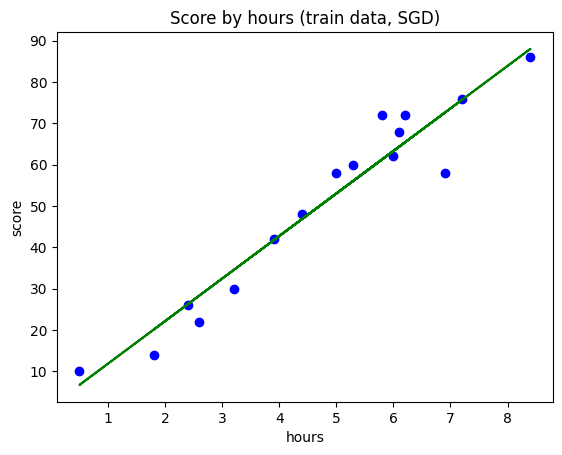

In [46]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법

# 지수표기법
# 1e-3 : 0.001 (10^-3)
# 1e+3 : 1000 (10^3)

# sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
sr = SGDRegressor(verbose=1) # 객체 생성
sr.fit(X_train, y_train)    # 학습 (모델 생성)

plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, sr.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data, SGD)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [42]:
sr.coef_, sr.intercept_

(array([10.39854126]), array([1.05166647]))

In [44]:
sr.score(X_train, y_train) #학습 데이터 정확도 (0 ~ 1)

0.9730633834227881

In [45]:
sr.score(X_test, y_test) #테스트 데이터 정확도 (0 ~ 1)

0.9730633834227881